In [3]:
pip install tensorflow


     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ------------------------------- ------ 41.0/48.7 kB 991.0 kB/s eta 0:00:01
     ---------------------------------------- 48.7/48.7 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/390.3 MB 4.3 MB/s eta 0:01:31
   ---------------------------------------- 0.4/390.3 MB 4.6 MB/s eta 0:01:25
   ---------------------------------------- 0.6/390.3 MB 5.0 MB/s eta 0:01:19
   ---------------------------------------- 1.3/390.3 MB 8.2 MB/s eta 0:00:48
   ---------------------------------------- 2.4/390.3 MB 10.8 MB/s eta 0:00:37
   ---------------------------------------- 3.4/390.3 MB 12.7 MB/s eta 0:00:31
   ---------------------------------------- 3.9/390.3 MB 12.5 MB/s eta 0:00:31
   ---------------------------------------- 4.2/390.3 MB 12.6 MB/s eta 0:00:31
   ---------------------------------------- 4.2/390.3 MB 12.6 MB/s e

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [11]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Initialize a Sequential model
model = models.Sequential()

# Add a dense layer with 10 neurons, ReLU activation, and input shape of (4,)
model.add(layers.Dense(10, activation='relu', input_shape=(4,)))

# Add the output dense layer with 3 neurons (one per class) and softmax activation
model.add(layers.Dense(3, activation='softmax'))


C:\Users\Mouma\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Compile the model with the Adam optimizer, sparse categorical cross-entropy loss, and accuracy metric
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [17]:
# Train the model for 50 epochs on the training data
model.fit(X_train, y_train, epochs=50, batch_size=4, verbose=1)


Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3107 - loss: 3.3355
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3123 - loss: 2.3549
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3254 - loss: 1.6290
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 5.3763e-04 - loss: 1.2747
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0928 - loss: 1.2078     
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3812 - loss: 1.1203
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3774 - loss: 1.0876
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4642 - loss: 1.0103  
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6377 - loss: 0.9443
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5818 - loss: 0.8686
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6503 - loss: 0.8263
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 

In [19]:
# Evaluate the model on the test data and display accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.9667


In [38]:
# Make predictions on the test set
pred_y = model.predict(X_test)
np.argmax(pred_y[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


C:\Users\Mouma\AppData\Local\Temp\ipykernel_6868\2059813733.py:23: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


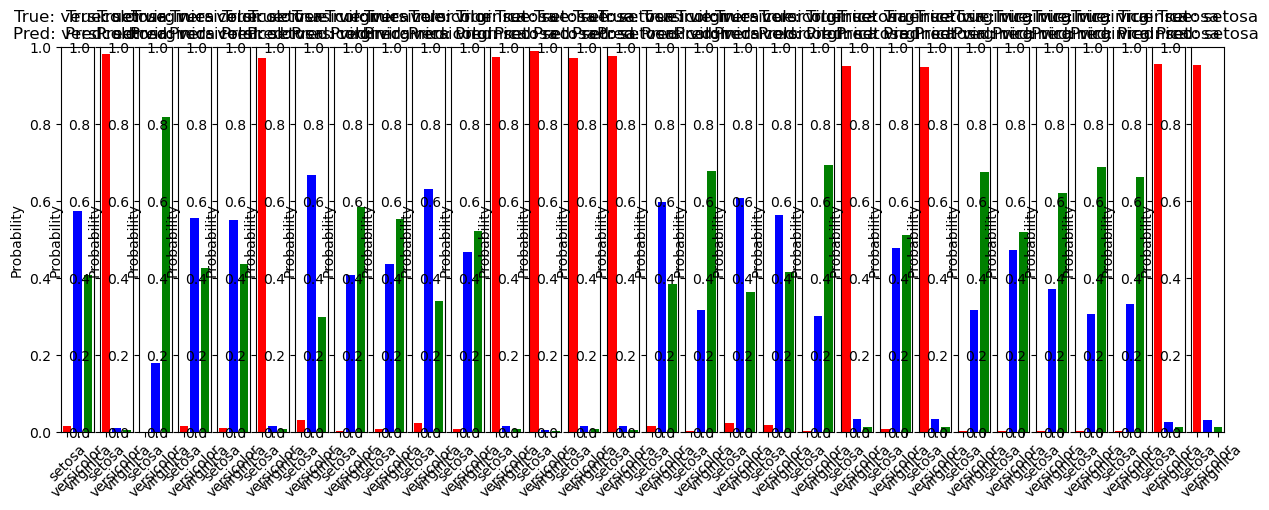

In [25]:


# Plot the predictions
num_classes = 3
num_samples = len(X_test)
fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

# Loop through each test sample and plot the prediction probabilities
for i in range(num_samples):
    true_label = y_test[i]
    pred_label = np.argmax(pred_y[i])
    probas = pred_y[i]

    # Plot bar chart for each sample
    axes[i].bar(range(num_classes), probas, color=['red', 'blue', 'green'])
    axes[i].set_xticks(range(num_classes))
    axes[i].set_xticklabels(iris.target_names, rotation=45)
    axes[i].set_ylim(0, 1)
    axes[i].set_title(f"True: {iris.target_names[true_label]}\nPred: {iris.target_names[pred_label]}")
    axes[i].set_ylabel("Probability")

plt.tight_layout()
plt.show()


C:\Users\Mouma\AppData\Local\Temp\ipykernel_6868\885878262.py:29: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


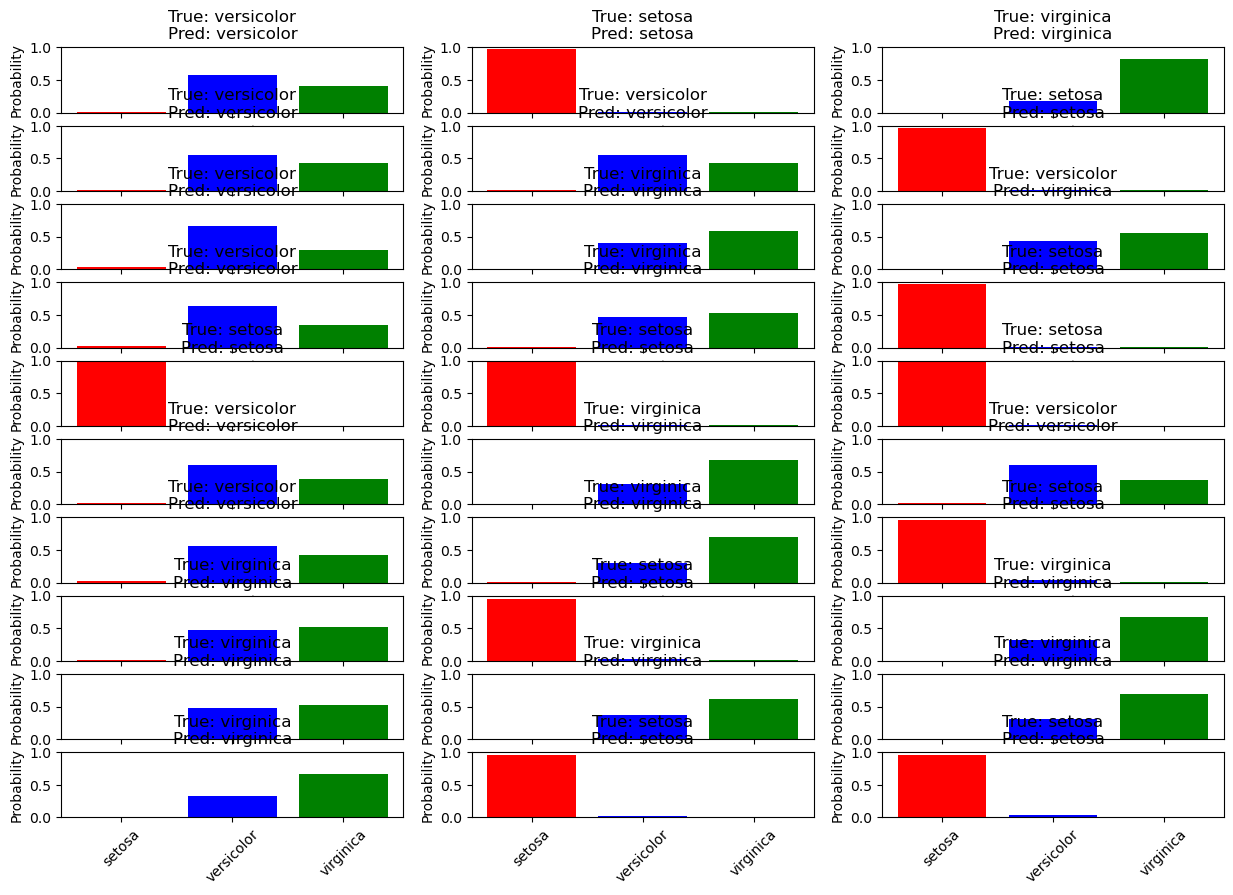

In [30]:
import math

# Determine the grid size for subplots
num_samples = len(X_test)
cols = 3  # Number of columns for the grid
rows = math.ceil(num_samples / cols)  # Calculate rows needed

fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
axes = axes.flatten()  # Flatten to easily iterate over each subplot

# Plot predictions with probabilities
for i in range(num_samples):
    true_label = y_test[i]
    pred_label = np.argmax(pred_y[i])
    probas = pred_y[i]

    # Plot bar chart for each test sample
    axes[i].bar(range(num_classes), probas, color=['red', 'blue', 'green'])
    axes[i].set_xticks(range(num_classes))
    axes[i].set_xticklabels(iris.target_names, rotation=45)
    axes[i].set_ylim(0, 1)
    axes[i].set_title(f"True: {iris.target_names[true_label]}\nPred: {iris.target_names[pred_label]}")
    axes[i].set_ylabel("Probability")

# Remove any empty subplots if test samples < total grid cells
for j in range(num_samples, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
